<a href="https://colab.research.google.com/github/nmshafie1993/detect_yoga_pose/blob/master/Yoga_pose_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the libraries

import math, re, os
import numpy as np
import pandas as pd
import tensorflow as tf
import pathlib
import PIL
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
import shutil

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [3]:
#run if you want to delete the downloaded images

#shutil.rmtree('/content/detect_yoga_pose')

In [4]:
#cloning the data from github

!git clone "https://github.com/nmshafie1993/detect_yoga_pose.git"

Cloning into 'detect_yoga_pose'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1279 (delta 27), reused 43 (delta 15), pack-reused 1204
Receiving objects: 100% (1279/1279), 137.65 MiB | 47.22 MiB/s, done.
Resolving deltas: 100% (172/172), done.


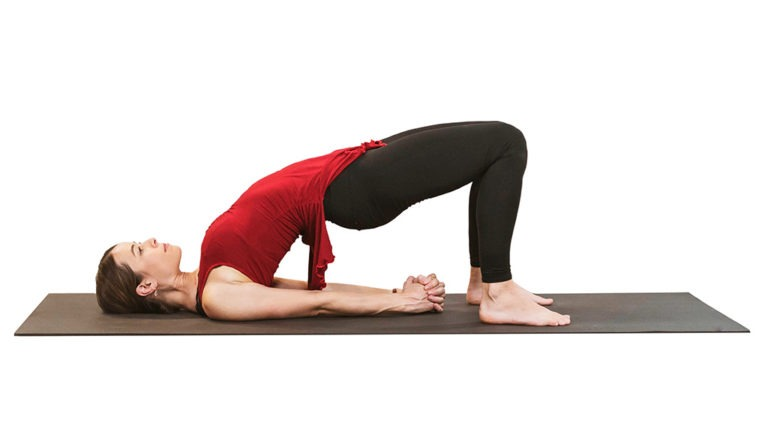

In [5]:
# displaying an image from bridge pose class (first way of displaying image)

Image(filename='/content/detect_yoga_pose/Train_Set/bridge/1.jpg', width = 224, height=224)

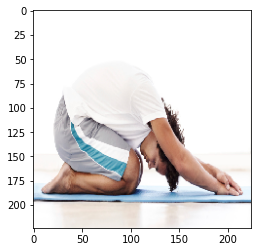

In [6]:
# displaying an image from child pose class (second way of displaying image)

img = image.load_img('/content/detect_yoga_pose/Train_Set/childs/2.jpg', target_size = (224, 224))
plt.imshow(img);

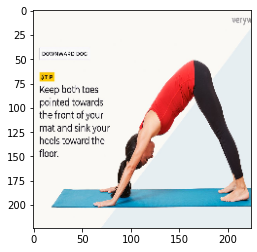

In [7]:
# displaying an image from down ward facing dog pose class (third way of displaying image)

img_2 = cv2.imread('/content/detect_yoga_pose/Train_Set/downwarddog/3.jpg')
img_2 = cv2.resize(img_2, (224,224))
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB));

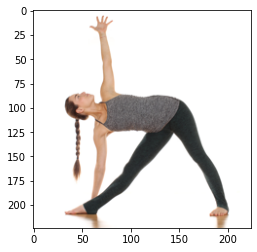

In [9]:
# displaying an image from triangle pose class (fourth way of displaying image)

img_3 = PIL.Image.open('/content/detect_yoga_pose/Train_Set/trianglepose/3.jpg')
img_3 = img_3.resize((224,224))
plt.imshow(img_3);

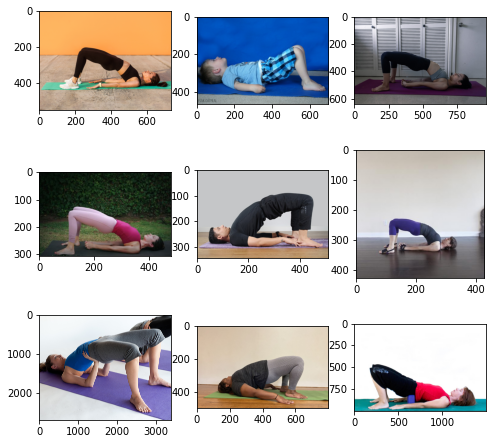

In [8]:
# Data Visulization of bridge pose

dataDict_bridge = '/content/detect_yoga_pose/Train_Set/bridge'
i = 0
path = dataDict_bridge
fig=plt.figure(figsize=(8, 8)) 
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

In [ ]:
# Data Visulization of childs pose

dataDict_bridge = '/content/detect_yoga_pose/Train_Set/childs'
i = 0
path = dataDict_bridge
fig=plt.figure(figsize=(8, 8)) 
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

In [ ]:
# Data Visulization of downward dog pose

dataDict_bridge = '/content/detect_yoga_pose/Train_Set/downwarddog'
i = 0
path = dataDict_bridge
fig=plt.figure(figsize=(8, 8)) 
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

In [ ]:
# Data Visulization of traiangle pose images

dataDict_bridge = '/content/detect_yoga_pose/Train_Set/trianglepose'
i = 0
path = dataDict_bridge
fig=plt.figure(figsize=(8, 8)) 
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    if i < 9:
      plt.subplot(3, 3, i+1)
      plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB));
    else:
      break
    i += 1

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range=(0.2, 0.8),
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Train_Set',
    #color_mode = 'grayscale',
    #classes='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=True,
)
validation_set = test_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Valid_Set',
    #color_mode = 'grayscale',
    #labels='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=False,
)
test_set = test_datagen.flow_from_directory(
    '/content/detect_yoga_pose/Test_Set',
    #color_mode = 'grayscale',
    #labels='inferred',
    class_mode='categorical',
    target_size=(224, 224),
    #interpolation='nearest',
    batch_size=64,
    #shuffle=False,
)

Found 837 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 41 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
model = Sequential([
        Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
        MaxPool2D(pool_size = (2,2), strides = 2),
        Dropout(0.2),
        Flatten(),
        Dense(units =128, activation = 'relu'),
        Dense(units =4, activation = 'softmax'),
        
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam (learning_rate = 0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
history = model.fit(x = training_set, 
          validation_data = validation_set, epochs = 30, 
          verbose = 2)


Epoch 1/30
14/14 - 22s - loss: 1.4839 - accuracy: 0.2748 - val_loss: 1.4048 - val_accuracy: 0.3000
Epoch 2/30
14/14 - 21s - loss: 1.3604 - accuracy: 0.3214 - val_loss: 1.4844 - val_accuracy: 0.2750
Epoch 3/30
14/14 - 21s - loss: 1.3164 - accuracy: 0.3859 - val_loss: 1.5801 - val_accuracy: 0.2750
Epoch 4/30
14/14 - 21s - loss: 1.3126 - accuracy: 0.3584 - val_loss: 1.5147 - val_accuracy: 0.3000
Epoch 5/30
14/14 - 21s - loss: 1.3011 - accuracy: 0.4014 - val_loss: 1.5867 - val_accuracy: 0.2250
Epoch 6/30
14/14 - 21s - loss: 1.2360 - accuracy: 0.4767 - val_loss: 1.4513 - val_accuracy: 0.3500
Epoch 7/30
14/14 - 21s - loss: 1.1715 - accuracy: 0.5460 - val_loss: 1.4219 - val_accuracy: 0.3750
Epoch 8/30
14/14 - 21s - loss: 1.1749 - accuracy: 0.5137 - val_loss: 1.4192 - val_accuracy: 0.3750
Epoch 9/30
14/14 - 21s - loss: 1.1034 - accuracy: 0.5627 - val_loss: 1.4497 - val_accuracy: 0.3500
Epoch 10/30
14/14 - 20s - loss: 1.1103 - accuracy: 0.5448 - val_loss: 1.4949 - val_accuracy: 0.4000
Epoch 11/

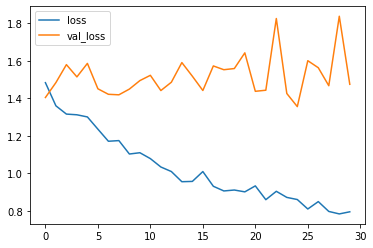

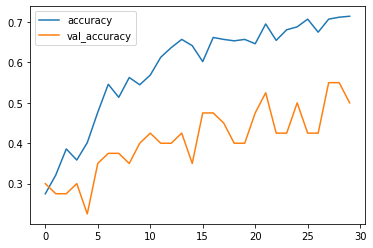

In [ ]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_set.reset()

pred = model.predict_generator(test_set, verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

In [ ]:
TEST_DIR = '../input/test-files-prepd/test4keras/test4keras/'
f, ax = plt.subplots(5, 5, figsize = (15, 15))

for i in range(0,25):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    
    # a if condition else b
    predicted_class = "Dog" if predicted_class_indices[i] else "Cat"

    ax[i//5, i%5].imshow(imgRGB)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()

In [ ]:
predictions = model.predict (x = ds_test, verbose = 0)

In [ ]:
np.round(predictions)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],


In [ ]:
for image, label in ds_test_:
  print(label)

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(41, 4), dtype=float32)


In [ ]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis = -1))

This image most likely belongs to childs with a 34.08 percent confidence.


**Transfer Learning**

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
resnet_history = base_model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10


InvalidArgumentError: ignored